<a href="https://colab.research.google.com/github/Legacy560/MTLSA25-Sales-Forecasting-Project/blob/main/Cleaning%20and%20ARIMA/Sales_Forecasting_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Imports

In [2]:
# # Step 1: Upgrade numpy to a known compatible version
# !pip install numpy==1.24.4 --quiet

# # Step 2: Force reinstall pmdarima with no cache
!pip install pmdarima

!pip install --no-cache-dir pmdarima --quiet



  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.


In [2]:
# Uninstall numpy, scipy, and scikit-learn
!pip uninstall numpy scipy scikit-learn -y

# Install a specific, compatible version of numpy
!pip install numpy==1.24.3

# Reinstall scipy and scikit-learn
!pip install scipy scikit-learn

# Install pmdarima
!pip install pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hdbscan 0.8.40 requires scikit-learn>=0.20, which is not installed.
hdbscan 0.8.40 requires scipy>=1.0, which is not installed.
datascience 0.17.6 requires scipy, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, which is not installed.
pytensor 2.30.3 requires scipy<2,>=1, which is not installed.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/37.7 MB 15.1 MB/s eta 0:00:03
ERROR: Operation cancelled by user
^C
^C


In [ ]:
# # Step 1: Upgrade numpy to a known compatible version
# !pip install numpy==1.24.4 --quiet

# # Step 2: Force reinstall pmdarima with no cache
# !pip uninstall -y pmdarima
# !pip install --no-cache-dir pmdarima --quiet
# !pip install --upgrade numpy
# !pip install --upgrade scipy
# !pip install --upgrade statsmodels



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
import pylab as pl
import json
import os
import warnings
import dask.dataframe as dd
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Keras Imports (May need to upgrade numpy to use. pmdarima requires an earlier version of numpy)
from keras.models import Model
from keras.layers import Input, Dense, LayerNormalization, Dropout
from keras.layers import MultiHeadAttention, Add, GlobalAveragePooling1D, Reshape
from keras.optimizers import Adam


#Data Aquisition

In [ ]:
#!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")



Mounted at /content/gdrive


In [2]:
cd /content/gdrive/Shareddrives/MLTSA25-Sales-Forecasting/Project

/content/gdrive/Shareddrives/MLTSA25-Sales-Forecasting/Project


In [ ]:
# envs = json.load(open("kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#!kaggle competitions download -c m5-forecasting-accuracy

In [ ]:
#!unzip m5-forecasting-accuracy.zip

#Read in data

In [3]:
cal = pd.read_csv('calendar.csv')
prices = pd.read_csv('sell_prices.csv')
salesVal = pd.read_csv('sales_train_validation.csv')
salesEval = pd.read_csv('sales_train_evaluation.csv')
display(cal.head())
display(salesVal.head())
display(prices.head())

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
#type of column d in cal
cal.dtypes
#number missing items in cal
cal.isnull().sum()

#number of entries in cal
cal.shape

(1969, 14)

#Reshape sales data into long format.

This allows for us to merge the sales dataset with the calendar dataset. These datasets are large, however; and any operations will cause the Python session to crash. Thus, before we can do anything else, we need to deal with the storage and memory that these datasets take up.

In [4]:
#This code came from: https://www.kaggle.com/competitions/m5-forecasting-accuracy/data. I take no credit for it.

#Downcast in order to save memory
def downcast(df):

  '''
  Changes column types in the dataframe to reduce memory usage.
  Input:
    df (pandas dataframe): dataframe to be downcast.
  Output:
    df (pandas dataframe): dataframe with reduced memory usage.
  '''
  cols = df.dtypes.index.tolist()
  types = df.dtypes.values.tolist()
  for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
  return df

salesVal = downcast(salesVal)
prices = downcast(prices)
cal = downcast(cal)
salesEval = downcast(salesEval)

In [5]:
salesValLong = salesVal.melt(id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
                         var_name="d", value_name="units_sold").dropna()
#This gives us a column "d" containing each sales day. This is the same as the "d" column from calendar

In [6]:
salesEvalLong = salesEval.melt(id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
                         var_name="d", value_name="units_sold").dropna()



In [ ]:
display(salesVal.head())
display(salesValLong.head(20))
display(cal.head())
display(prices.head())

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.578125
1,CA_1,HOBBIES_1_001,11326,9.578125
2,CA_1,HOBBIES_1_001,11327,8.257812
3,CA_1,HOBBIES_1_001,11328,8.257812
4,CA_1,HOBBIES_1_001,11329,8.257812


In [ ]:
#Get size of these

In [ ]:
#Check for missing values
display(salesValLong.isnull().sum())
display(cal.isnull().sum())
display(prices.isnull().sum())

,0
id,0
item_id,0
dept_id,0
cat_id,0
store_id,0
state_id,0
d,0
units_sold,0


,0
date,0
wm_yr_wk,0
weekday,0
wday,0
month,0
year,0
d,0
event_name_1,1807
event_type_1,1807
event_name_2,1964


,0
store_id,0
item_id,0
wm_yr_wk,0
sell_price,0


#Merging Datasets

In [7]:
#Merge with Calendar dataset
salesValLong = salesValLong.merge(cal, on="d", how="left")

salesEvalLong = salesEvalLong.merge(cal, on="d", how="left")

In [8]:
#Merge with prices dataset
salesFull = salesValLong.merge(prices, on=["store_id", "item_id", "wm_yr_wk"], how="left")
del salesValLong
del cal
del salesVal


In [9]:
salesEvalFull = salesEvalLong.merge(prices, on=["store_id", "item_id", "wm_yr_wk"], how="left")
del salesEvalLong

del prices
del salesEval

In [10]:
downcast(salesFull) #See if this improves our memory

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.980469
58327366,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,2.480469
58327367,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,3.980469
58327368,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3,2016-04-24,11613,...,4,2016,NaN,NaN,NaN,NaN,0,0,0,1.280273


In [11]:
downcast(salesEvalFull)

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,...,5,2016,NaN,NaN,NaN,NaN,0,0,0,2.980469
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,...,5,2016,NaN,NaN,NaN,NaN,0,0,0,2.480469
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2016-05-22,11617,...,5,2016,NaN,NaN,NaN,NaN,0,0,0,3.980469
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,...,5,2016,NaN,NaN,NaN,NaN,0,0,0,1.280273


In [ ]:
salesFull.shape

(58327370, 22)

In [12]:
salesFull = salesFull[salesFull['units_sold'] != 0]

In [13]:
salesEvalFull = salesEvalFull[salesEvalFull['units_sold'] != 0]

In [13]:
#save both of these datasets to csv files
salesFull.to_csv('salesFull.csv', index=False)
salesEvalFull.to_csv('salesEvalFull.csv', index=False)

KeyboardInterrupt: 

In [ ]:
display(salesFull.columns)

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'units_sold', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price'],
      dtype='object')

In [ ]:
salesFull.shape

(58327370, 22)

Get some statistics

In [ ]:
salesFull.describe()

,units_sold,date,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price
count,5.832737e+07,58327370,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,4.602796e+07
mean,1.126322e+00,2013-09-11 00:00:00.000000768,1.133919e+04,3.997386e+00,6.357554e+00,2.013209e+03,3.293257e-01,3.293257e-01,3.293257e-01,NaN
min,0.000000e+00,2011-01-29 00:00:00,1.110100e+04,1.000000e+00,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000214e-02
25%,0.000000e+00,2012-05-21 00:00:00,1.121700e+04,2.000000e+00,3.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.179688e+00
50%,0.000000e+00,2013-09-11 00:00:00,1.133300e+04,4.000000e+00,6.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.470703e+00
75%,1.000000e+00,2015-01-02 00:00:00,1.144800e+04,6.000000e+00,9.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.839844e+00
max,7.630000e+02,2016-04-24 00:00:00,1.161300e+04,7.000000e+00,1.200000e+01,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.073125e+02
std,3.873108e+00,NaN,1.503742e+02,2.000652e+00,3.458773e+00,1.532086e+00,4.699684e-01,4.699684e-01,4.699684e-01,0.000000e+00


In [ ]:
#Check for missing values in full dataset
display(salesFull.isnull().sum())

#Add total sale column
salesFull['total_sale'] = salesFull['units_sold'] * salesFull['sell_price']

,0
id,0
item_id,0
dept_id,0
cat_id,0
store_id,0
state_id,0
d,0
units_sold,0
date,0
wm_yr_wk,0


#Data Analysis

,total_sale
date,
2011-01-29,36276.601562
2011-01-30,35047.742188
2011-01-31,25283.880859
2011-02-01,26917.210938
2011-02-02,25176.089844


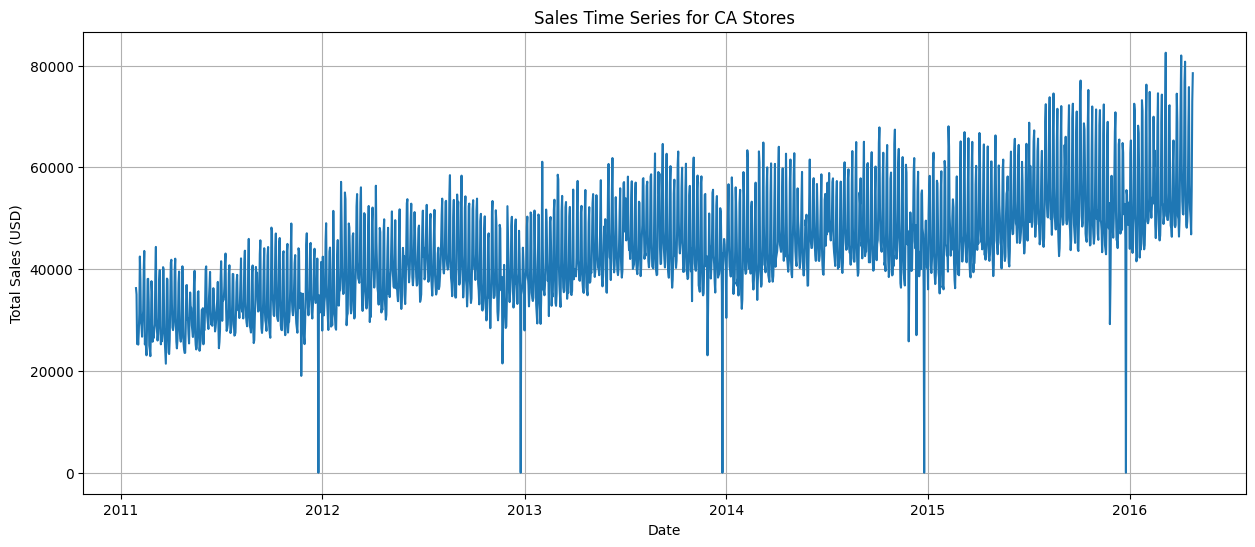

,total_sale
date,
2011-01-29,24100.949219
2011-01-30,23771.890625
2011-01-31,16610.101562
2011-02-01,17958.199219
2011-02-02,14456.099609


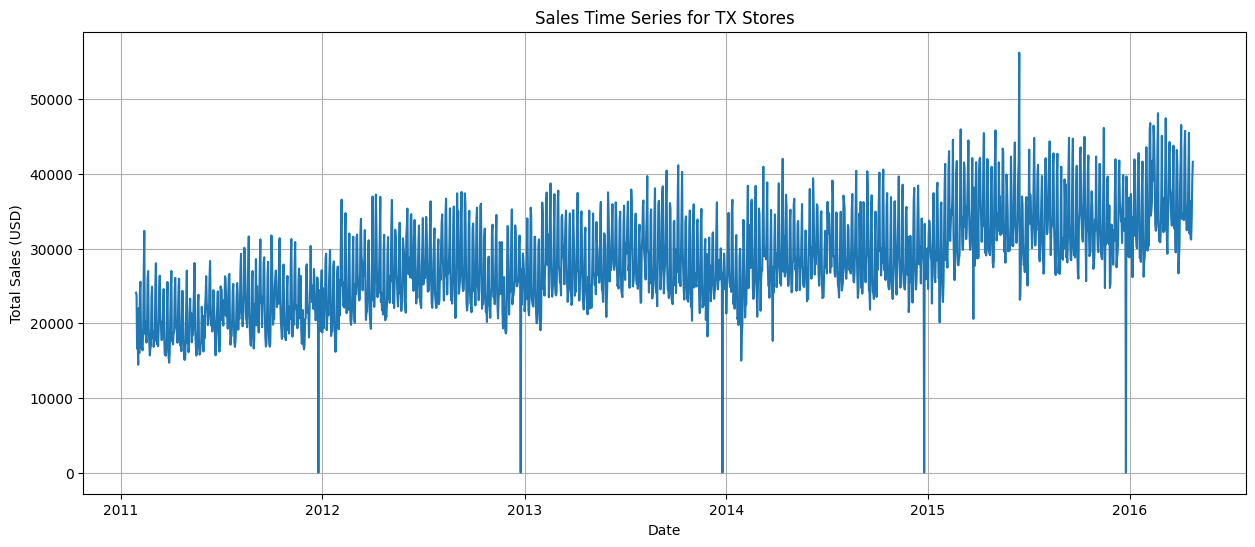

,total_sale
date,
2011-01-29,21274.468750
2011-01-30,20151.740234
2011-01-31,15813.670898
2011-02-01,15886.568359
2011-02-02,7328.752930


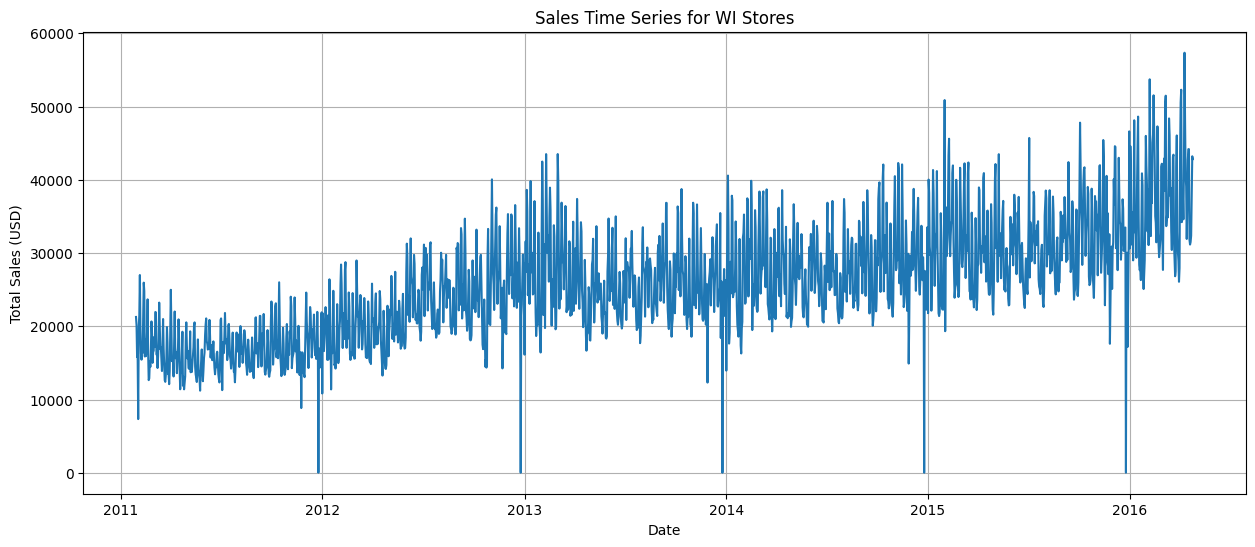

In [ ]:
# prompt: I want to plot some times series from salesFull of the sales from all the stores in California over the whole time domain

stateList = salesFull['state_id'].unique()
sales_data = {}  # Create an empty dictionary to store sales data for each state

for i in stateList:

  # Filter for stores
  theSales = salesFull[salesFull['state_id'] == i]

  # Group by date and sum sales
  #change sales_by_date so that it is named for each state

  sales_data[f'sales_by_date{i}'] = theSales.groupby('date')['total_sale'].sum()
  display(sales_data[f'sales_by_date{i}'].head())
  # Plot the time series
  plt.figure(figsize=(15, 6))
  plt.plot(sales_data[f'sales_by_date{i}'].index, sales_data[f'sales_by_date{i}'].values)  # Plot using the new variable name

  plt.xlabel('Date')
  plt.ylabel('Total Sales (USD)')
  plt.title(f'Sales Time Series for {i} Stores')
  plt.grid(True)
  plt.show()


Those regular low values are all from Christmas Day. Walmart is usually closed around this time. Perhaps a few stores were open for a few hours over this time period. Otherwise, there is definite seasonality with an overall upward trend.

In [ ]:
#Figure out what those low values are. It's Christmas
display(sales_data['sales_by_dateCA'].sort_values(ascending=True).head(10))
display(sales_data['sales_by_dateTX'].sort_values(ascending=True).head(10))
display(sales_data['sales_by_dateWI'].sort_values(ascending=True).head(20))

,total_sale
date,
2014-12-25,10.178711
2011-12-25,10.882324
2013-12-25,11.501953
2015-12-25,11.520508
2012-12-25,13.529785
2011-11-24,19033.308594
2011-03-24,21426.302734
2012-11-22,21478.867188
2011-02-24,22904.308594


,total_sale
date,
2011-12-25,3.360352
2012-12-25,5.259766
2015-12-25,12.759766
2013-12-25,20.242188
2014-12-25,24.998535
2011-02-02,14456.099609
2011-03-30,14726.674805
2014-01-28,15004.984375
2011-04-27,15099.568359


,total_sale
date,
2013-12-25,2.580078
2014-12-25,2.679688
2012-12-25,5.939453
2015-12-25,6.509766
2011-12-25,9.441406
2011-02-02,7328.752930
2011-11-24,8834.998047
2012-01-01,10822.994141
2011-05-25,11208.576172


##Data Cleaning

We will now clean our data a bit before fitting an ARIMA model to it.

In [ ]:
sales_data['sales_by_dateCA'].head()

,total_sale
date,
2011-01-29,36276.601562
2011-01-30,35047.742188
2011-01-31,25283.880859
2011-02-01,26917.210938
2011-02-02,25176.089844


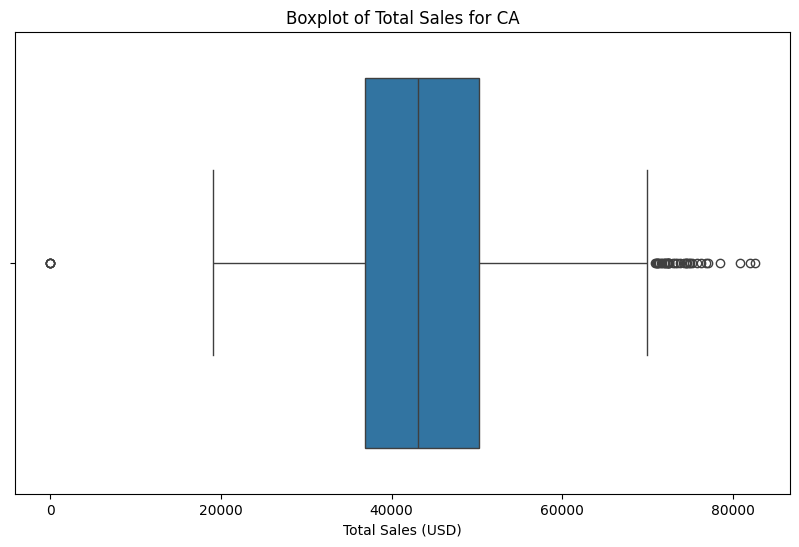

Potential outliers for CA:
date
2011-12-25       10.882324
2012-12-25       13.529785
2013-12-25       11.501953
2014-12-25       10.178711
2015-08-02    72408.007812
2015-08-09    73776.929688
2015-08-16    74514.921875
2015-08-23    71507.742188
2015-08-30    72038.218750
2015-09-13    72212.890625
2015-09-20    72506.914062
2015-09-27    70969.937500
2015-10-03    74903.367188
2015-10-04    77051.523438
2015-10-18    75201.671875
2015-10-25    71959.328125
2015-11-01    71375.273438
2015-11-08    71249.898438
2015-11-15    72359.875000
2015-12-06    70812.632812
2015-12-25       11.520508
2016-01-09    72495.632812
2016-01-10    71077.734375
2016-01-23    73196.265625
2016-01-24    71126.078125
2016-01-31    76247.648438
2016-02-06    74823.468750
2016-02-21    74551.281250
2016-02-28    74294.523438
2016-03-05    71615.804688
2016-03-06    82518.234375
2016-03-12    72018.906250
2016-03-13    72199.164062
2016-03-26    74473.710938
2016-04-02    73376.406250
2016-04-03    81978.523

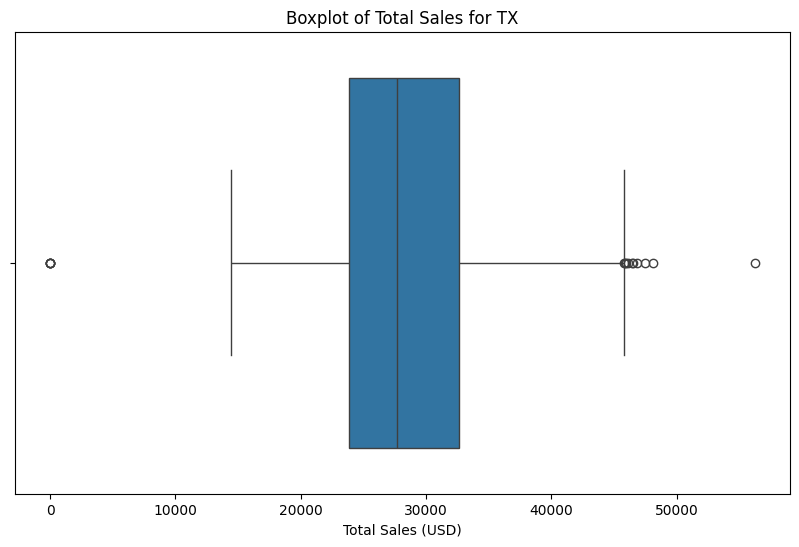

Potential outliers for TX:
date
2011-12-25        3.360352
2012-12-25        5.259766
2013-12-25       20.242188
2014-12-25       24.998535
2015-03-01    45951.949219
2015-05-03    45817.292969
2015-06-15    56207.746094
2015-11-15    46143.714844
2015-12-25       12.759766
2016-02-06    45890.265625
2016-02-07    46790.238281
2016-02-13    46448.636719
2016-02-21    48116.582031
2016-03-06    47439.472656
2016-04-03    46542.691406
Name: total_sale, dtype: float32
--------------------


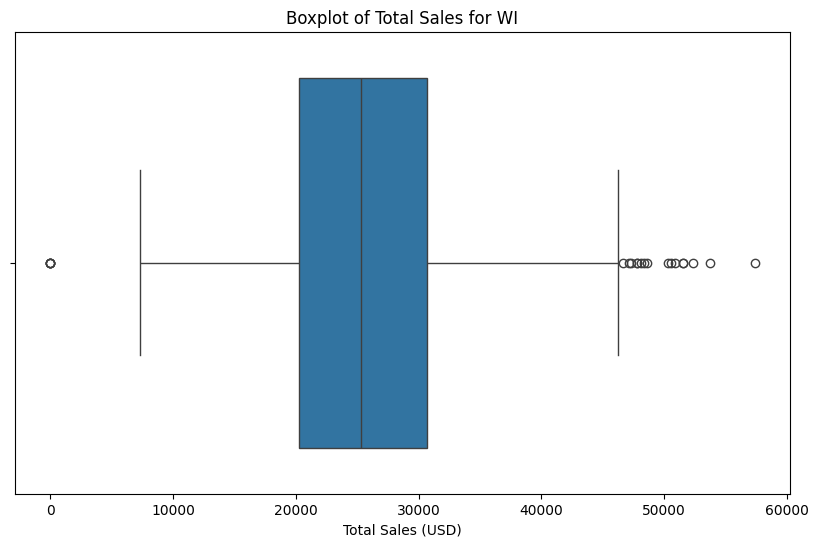

Potential outliers for WI:
date
2011-12-25        9.441406
2012-12-25        5.939453
2013-12-25        2.580078
2014-12-25        2.679688
2015-01-31    50893.859375
2015-10-03    47806.894531
2015-12-25        6.509766
2015-12-31    46618.433594
2016-01-09    48132.652344
2016-01-16    48634.566406
2016-02-06    53726.546875
2016-02-13    51541.621094
2016-02-14    47098.195312
2016-02-20    47299.785156
2016-03-05    50341.109375
2016-03-06    51489.746094
2016-03-12    48385.035156
2016-04-02    50560.582031
2016-04-03    52303.343750
2016-04-09    57358.941406
2016-04-10    47817.488281
Name: total_sale, dtype: float32
--------------------


In [ ]:
# prompt: Check the datasets for outliers

import matplotlib.pyplot as plt
# Check for outliers using boxplots for each state's sales data
for state in stateList:
    sales_series = sales_data[f'sales_by_date{state}']
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sales_series.values)
    plt.title(f'Boxplot of Total Sales for {state}')
    plt.xlabel('Total Sales (USD)')
    plt.show()

    # Identify potential outliers using IQR
    Q1 = sales_series.quantile(0.25)
    Q3 = sales_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sales_series[(sales_series < lower_bound) | (sales_series > upper_bound)]
    print(f"Potential outliers for {state}:")
    print(outliers)
    print("-" * 20)

#Further analysis of outliers:
#1. Investigate the dates corresponding to outliers. Are there any special events or holidays?
#2. Consider the context of the data. Are the outliers truly errors or do they represent legitimate extreme values?
#3. Decide on a strategy for handling outliers (removal, transformation, or capping)
#4. Visualize the data after outlier handling to confirm its effect.


This cell below checks if our data is stationary using the AD Fuller test. Run it after applying transformations to check for stationarity.

In [ ]:
#Make 3 dfs for the total sales
salesCA = pd.DataFrame(sales_data['sales_by_dateCA'])
salesTX = pd.DataFrame(sales_data['sales_by_dateTX'])
salesWI = pd.DataFrame(sales_data['sales_by_dateWI'])

#Release sales_data
del sales_data

In [5]:
#Check our datasets for stationarity
#We will use the ADF test to do this

def adfuller_test(sales_series):
    result=adfuller(sales_series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
          print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
          print("Weak evidence against null hypothesis. Data is not stationary.")
    print("================================")
    print("================================")

'''
adfuller_test(salesCA['total_sale'])
adfuller_test(salesTX['total_sale'])
adfuller_test(salesWI['total_sale'])
'''


"\nadfuller_test(salesCA['total_sale'])\nadfuller_test(salesTX['total_sale'])\nadfuller_test(salesWI['total_sale'])\n"

In [ ]:
#Get rid of the Christmas.
yearList = salesFull['year'].unique()
yearList = np.delete(yearList, -1)
print(yearList)

for i in yearList:
  #remove only christmas day
  salesCA.drop(f"{i}-12-25", axis = 0, inplace = True)
  salesTX.drop(f"{i}-12-25", axis = 0, inplace = True)
  salesWI.drop(f"{i}-12-25", axis = 0, inplace = True)



display(salesCA.sort_values(by = "total_sale", ascending=True).head(5))
display(salesTX.sort_values(by = "total_sale", ascending=True).head(5))
display(salesWI.sort_values(by = "total_sale", ascending=True).head(5))


[2011 2012 2013 2014 2015]


,total_sale
date,
2011-11-24,19033.308594
2011-03-24,21426.302734
2012-11-22,21478.867188
2011-02-24,22904.308594
2013-11-28,23078.205078


,total_sale
date,
2011-02-02,14456.099609
2011-03-30,14726.674805
2014-01-28,15004.984375
2011-04-27,15099.568359
2011-04-26,15201.435547


,total_sale
date,
2011-02-02,7328.752930
2011-11-24,8834.998047
2012-01-01,10822.994141
2011-05-25,11208.576172
2011-07-04,11282.075195


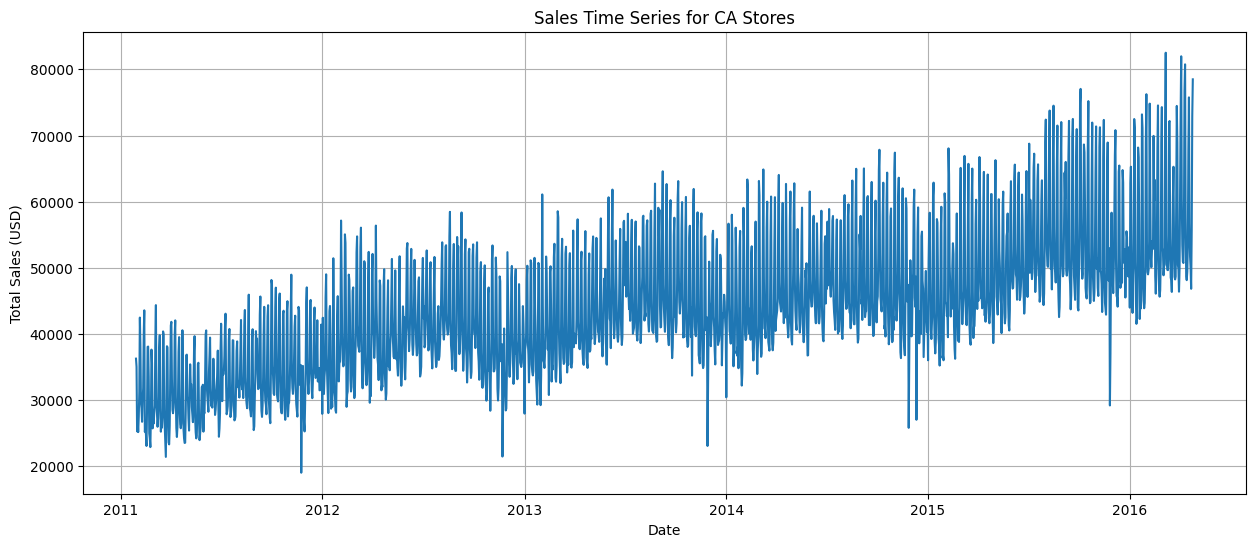

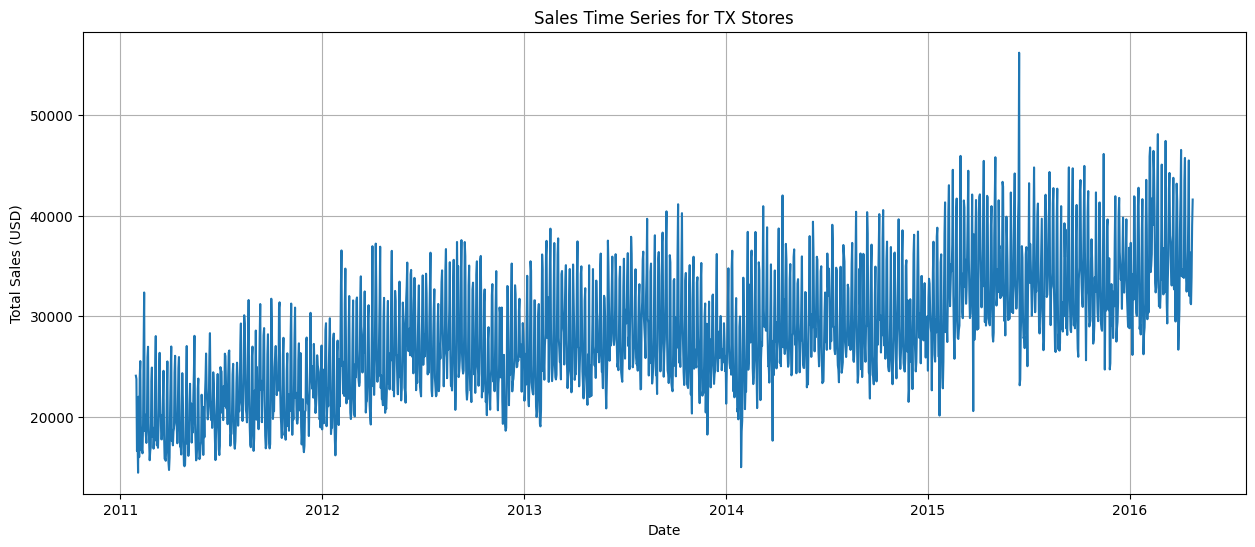

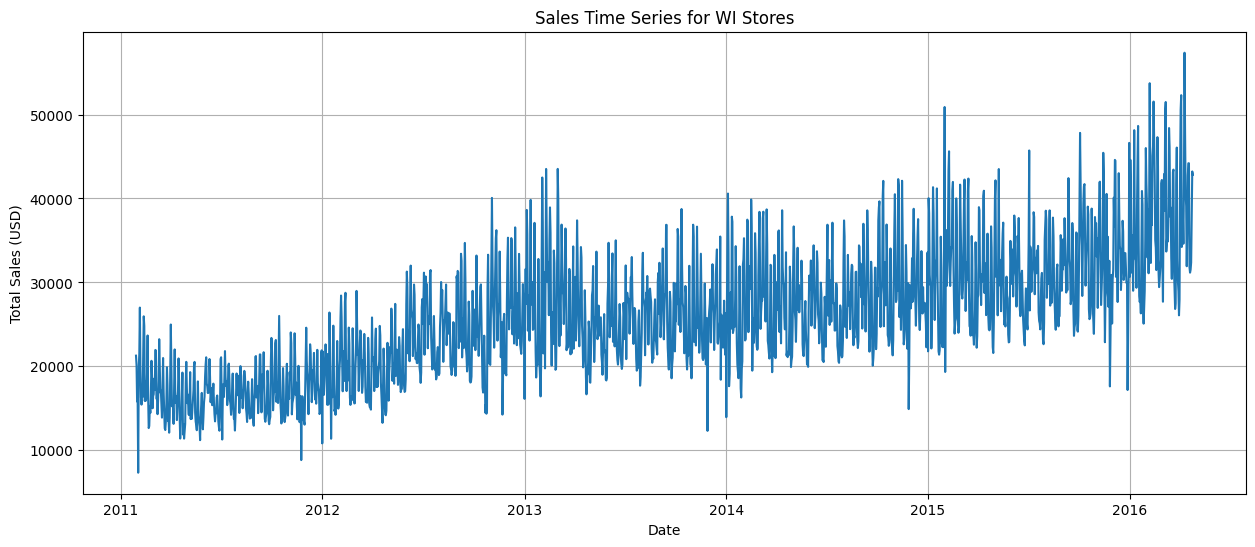

In [ ]:
# plot again
salesList = [salesCA, salesTX, salesWI]

  # Create an empty dictionary to store sales data for each state

for index, i in enumerate(salesList):
  plt.figure(figsize=(15, 6))
  plot(i.index, i["total_sale"])

  plt.xlabel('Date')
  plt.ylabel('Total Sales (USD)')
  plt.title(f'Sales Time Series for {stateList[index]} Stores')
  plt.grid(True)
  plt.show()


In [ ]:
#Get column names
type(salesCA.index.name)
salesCA.head()

,total_sale
date,
2011-01-29,36276.601562
2011-01-30,35047.742188
2011-01-31,25283.880859
2011-02-01,26917.210938
2011-02-02,25176.089844


##Transformations

We'll try a log transformation to remove the trend.

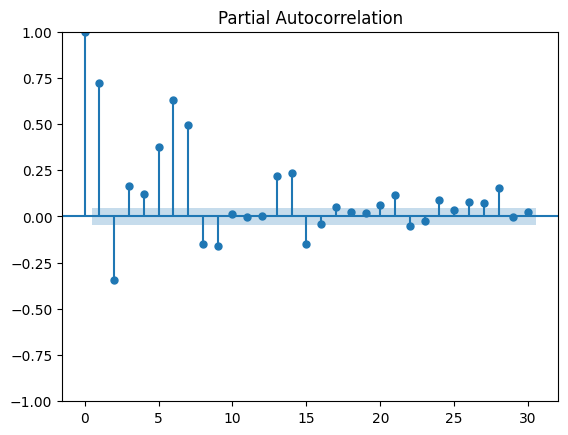

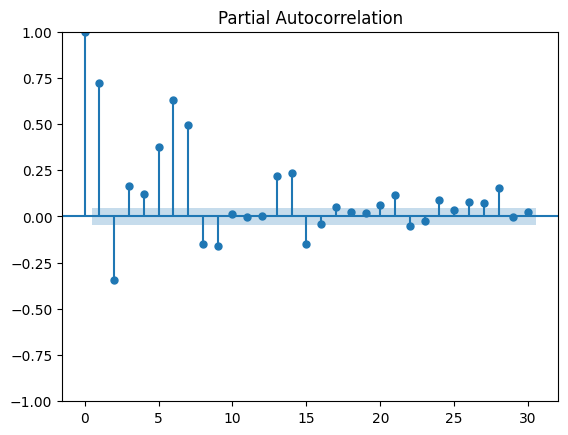

In [ ]:
#First plot ACF and PACF of this data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(salesCA['total_sale'], lags=30)



In [ ]:
#Log transform our 3 datasets
salesCA['total_sale_log'] = np.log(salesCA['total_sale'])
salesTX['total_sale_log'] = np.log(salesTX['total_sale'])
salesWI['total_sale_log'] = np.log(salesWI['total_sale'])


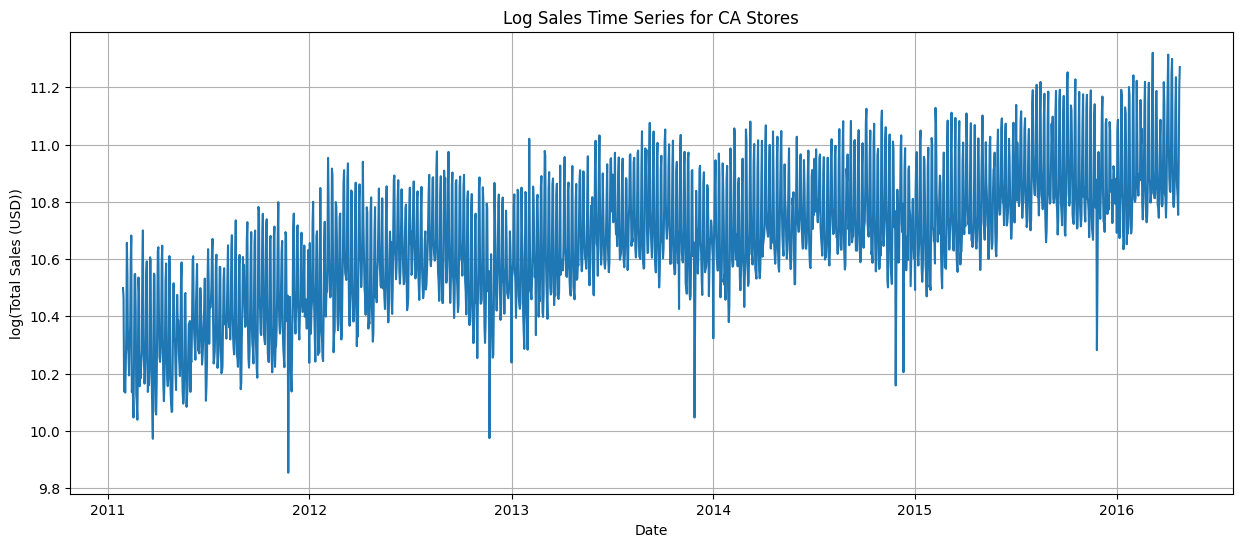

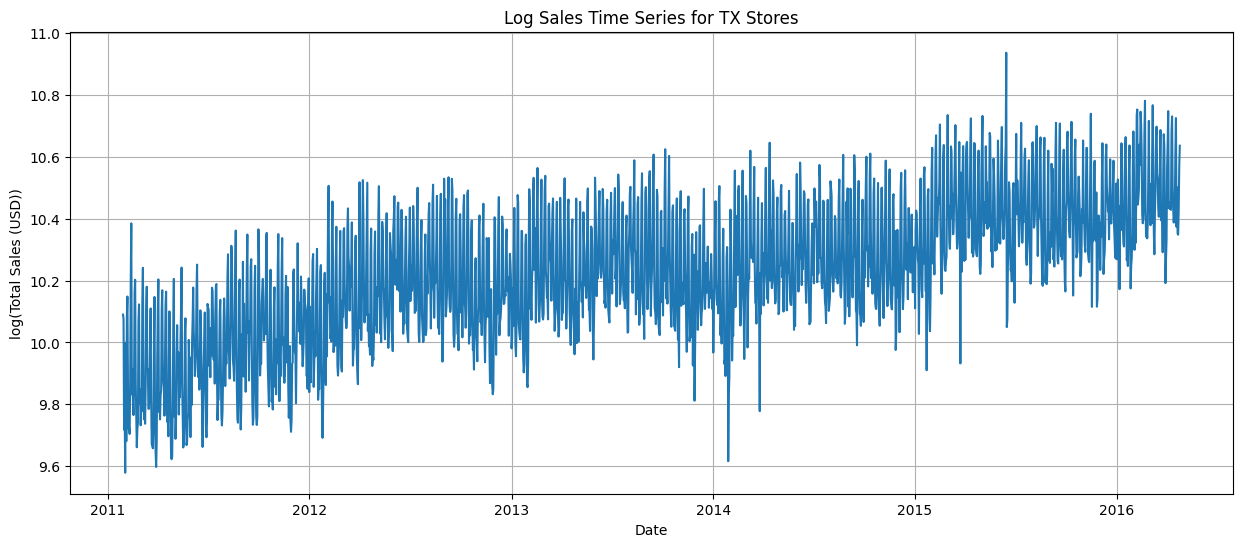

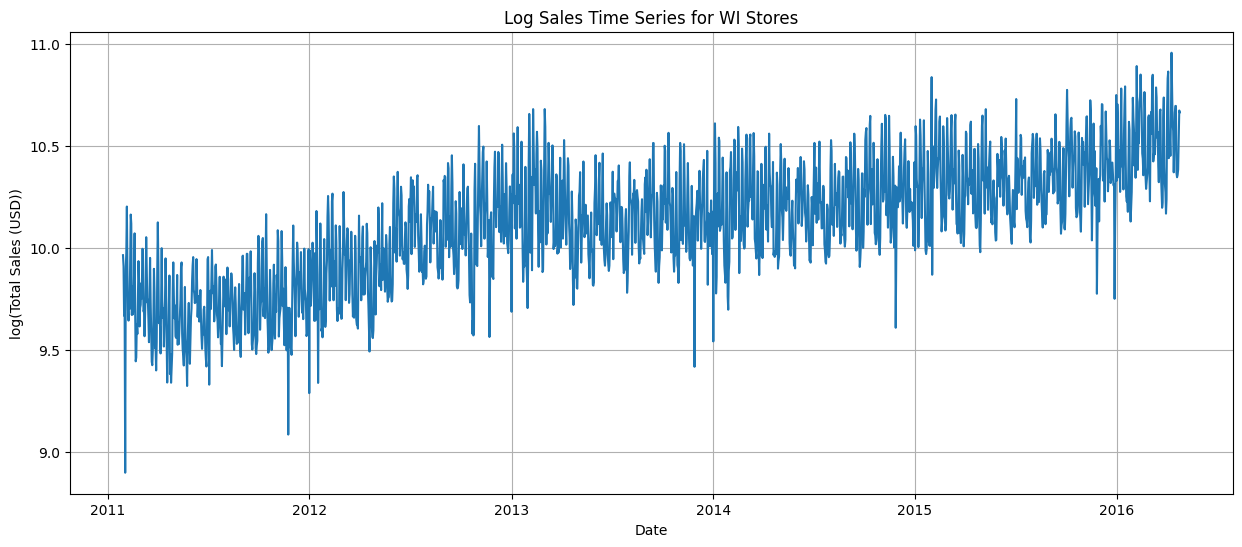

In [ ]:

for index, i in enumerate(salesList):
  plt.figure(figsize=(15, 6))
  plot(i.index, i["total_sale_log"])

  plt.xlabel('Date')
  plt.ylabel('log(Total Sales (USD))')
  plt.title(f'Log Sales Time Series for {stateList[index]} Stores')
  plt.grid(True)
  plt.show()


In [ ]:
#Check our datasets for stationarity
#We will use the ADF test to do this
adfuller_test(salesCA['total_sale_log'])
adfuller_test(salesTX["total_sale_log"])
adfuller_test(salesWI["total_sale_log"])



ADF Test Statistic : -1.3563947791720317
p-value : 0.6029934418227137
#Lags Used : 26
Number of Observations Used : 1881
Weak evidence against null hypothesis. Data is not stationary.
ADF Test Statistic : -1.651159535175138
p-value : 0.45643576305505074
#Lags Used : 26
Number of Observations Used : 1881
Weak evidence against null hypothesis. Data is not stationary.
ADF Test Statistic : -1.033452438869367
p-value : 0.7408686462772099
#Lags Used : 26
Number of Observations Used : 1881
Weak evidence against null hypothesis. Data is not stationary.


In [ ]:
#Try differencing
salesCA['total_sale_log_diff'] = salesCA['total_sale_log'].diff()
salesTX['total_sale_log_diff'] = salesTX['total_sale_log'].diff()
salesWI['total_sale_log_diff'] = salesWI['total_sale_log'].diff()

# Drop the first row (NaN due to differencing)
salesCA = salesCA.dropna()
salesTX = salesTX.dropna()
salesWI = salesWI.dropna()

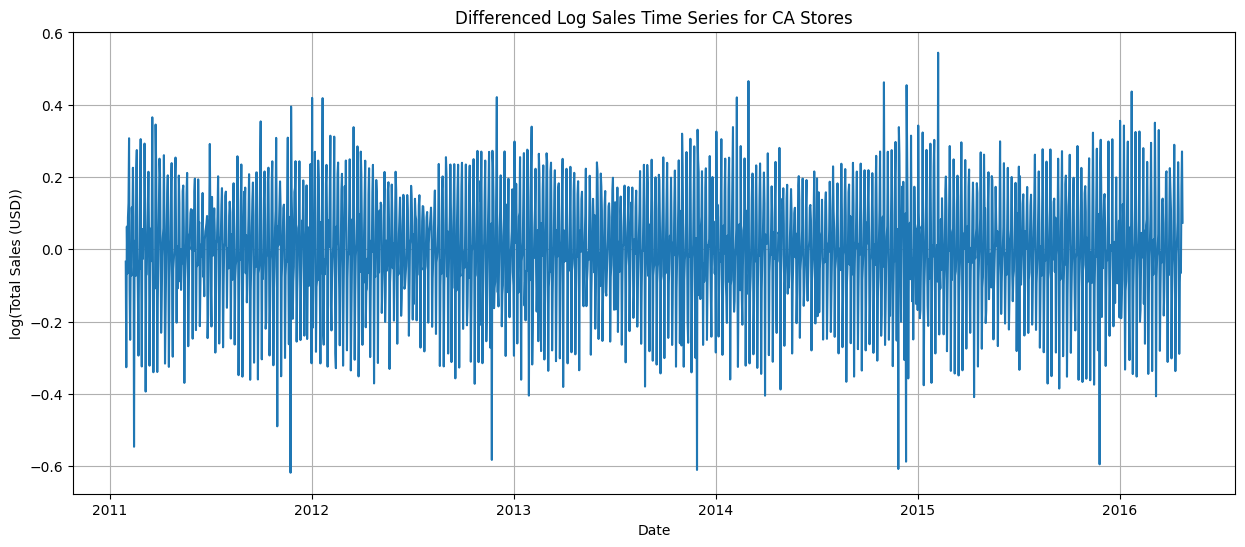

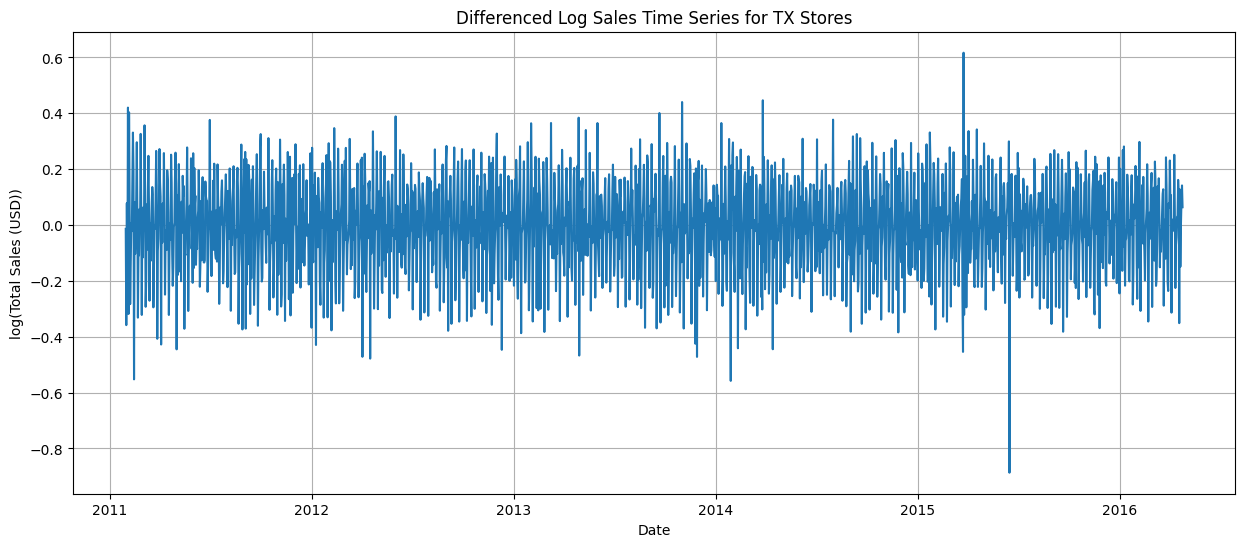

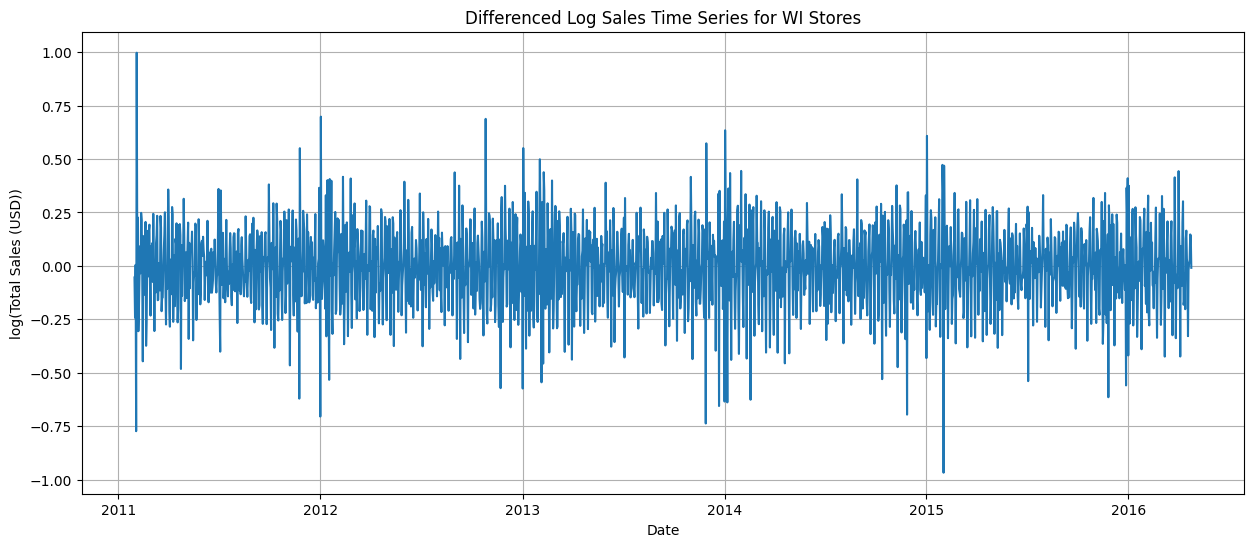

In [ ]:

for index, i in enumerate(salesList):
  plt.figure(figsize=(15, 6))
  plot(i.index, i["total_sale_log_diff"])

  plt.xlabel('Date')
  plt.ylabel('log(Total Sales (USD))')
  plt.title(f'Differenced Log Sales Time Series for {stateList[index]} Stores')
  plt.grid(True)
  plt.show()

In [ ]:
#Check Stationary
adfuller_test(salesCA['total_sale_log_diff'])
adfuller_test(salesTX['total_sale_log_diff'])
adfuller_test(salesWI['total_sale_log_diff'])

ADF Test Statistic : -19.740268108559835
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 1880
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -19.114103819380183
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 1880
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -23.11897905325106
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 1880
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Fitting the Model

The data is now stationary! We can begin fitting the model.

In [ ]:
?pm.auto_arima

Object `pm.auto_arima` not found.


## ARIMA on 10 products

I am going to use Arnab's code to create the dataset we want to work with.

In [30]:
#Get rid of all observations in both datasets not belonging to California
salesFull1 = salesFull[salesFull['store_id'] == 'CA_1']
salesEvalFull1 = salesEvalFull[salesEvalFull['store_id'] == 'CA_1']

In [27]:
salesEvalFull1.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price


In [31]:
# Use all products or a reproducible subset
np.random.seed(42)
product_subset_validation = np.random.choice(salesFull1['id'].unique(), size=10, replace=False)

# The product_subset_validation contains IDs like '..._validation'
# We need to create a corresponding list of IDs for the evaluation set

product_subset_evaluation = [pid.replace('_validation', '_evaluation') for pid in product_subset_validation]

# Now filter both dataframes using their respective subsets
salesFull1 = salesFull1[salesFull1['id'].isin(product_subset_validation)]
salesEvalFull1 = salesEvalFull1[salesEvalFull1['id'].isin(product_subset_evaluation)]

# Optional: Display the heads again to confirm
display(salesFull1.head())
display(salesEvalFull1.head())

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
343,HOBBIES_1_352_CA_1_validation,HOBBIES_1_352,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1027,HOUSEHOLD_1_472_CA_1_validation,HOUSEHOLD_1_472,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,4.820312
1173,HOUSEHOLD_2_077_CA_1_validation,HOUSEHOLD_2_077,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1444,HOUSEHOLD_2_349_CA_1_validation,HOUSEHOLD_2_349,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,4.468750
1517,HOUSEHOLD_2_422_CA_1_validation,HOUSEHOLD_2_422,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
343,HOBBIES_1_352_CA_1_evaluation,HOBBIES_1_352,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1027,HOUSEHOLD_1_472_CA_1_evaluation,HOUSEHOLD_1_472,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,4.820312
1173,HOUSEHOLD_2_077_CA_1_evaluation,HOUSEHOLD_2_077,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1444,HOUSEHOLD_2_349_CA_1_evaluation,HOUSEHOLD_2_349,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,4.468750
1517,HOUSEHOLD_2_422_CA_1_evaluation,HOUSEHOLD_2_422,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


In [40]:
#remove all columns except units_sold and Id.
salesFull1 = salesFull1[['id', 'units_sold', 'd']]
salesEvalFull2 = salesEvalFull1[['id', 'units_sold', 'd']]

In [32]:
#Reshape dataset so that the days are on the horizontal
salesFull1 = salesFull1.pivot(index='id', columns='d', values='units_sold')
# Convert column names to integers (ignoring the 'd_') and sort them
# We need to handle potential NaNs if some combinations of id and d don't exist
# though in this case, due to how the data was melted and filtered, it's less likely.
# However, converting to a numeric type for sorting is the key.

# Create a list of column names (e.g., ['d_1', 'd_2', ..., 'd_1913'])
column_names = salesFull1.columns.tolist()

# Sort the column names based on the numerical part after 'd_'
# We extract the number by splitting the string and converting to integer
sorted_column_names = sorted(column_names, key=lambda x: int(x.split('_')[1]))

# Reindex the DataFrame with the sorted column names
salesFull1 = salesFull1[sorted_column_names]

#salesEvalFull1 = salesEvalFull1.pivot(index='id', columns='d', values='units_sold')

In [33]:
#Reshape dataset so that the days are on the horizontal
salesEvalFull1 = salesEvalFull1.pivot(index='id', columns='d', values='units_sold')
# Convert column names to integers (ignoring the 'd_') and sort them
# We need to handle potential NaNs if some combinations of id and d don't exist
# though in this case, due to how the data was melted and filtered, it's less likely.
# However, converting to a numeric type for sorting is the key.

# Create a list of column names (e.g., ['d_1', 'd_2', ..., 'd_1913'])
column_names = salesEvalFull1.columns.tolist()

# Sort the column names based on the numerical part after 'd_'
# We extract the number by splitting the string and converting to integer
sorted_column_names = sorted(column_names, key=lambda x: int(x.split('_')[1]))

# Reindex the DataFrame with the sorted column names
salesEvalFull1 = salesEvalFull1[sorted_column_names]

#salesEvalFull1 = salesEvalFull1.pivot(index='id', columns='d', values='units_sold')

In [34]:
salesEvalFull1

d,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_352_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,...,1,2,3,1,0,0,2,1,1,1
HOUSEHOLD_1_472_CA_1_evaluation,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
HOUSEHOLD_2_077_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
HOUSEHOLD_2_349_CA_1_evaluation,0,5,1,0,1,0,0,0,2,0,...,0,2,1,2,3,3,0,0,0,0
HOUSEHOLD_2_422_CA_1_evaluation,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,2,0,0,0,0,0
FOODS_2_135_CA_1_evaluation,1,3,0,0,2,0,0,3,5,0,...,2,5,1,0,0,0,1,0,0,0
FOODS_2_257_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,10,0,0,0,0,0
FOODS_3_145_CA_1_evaluation,0,0,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,1,0,2,0
FOODS_3_439_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,...,2,2,4,3,3,2,8,3,2,4


In [35]:
salesFull1.to_csv('salesFull1.csv') #So I can easily access it again
salesEvalFull1.to_csv('salesEvalFull1.csv')

In [8]:
#Get salesFull1 back
salesFull1 = pd.read_csv('salesFull1.csv', index_col=0)
salesEvalFull1 = pd.read_csv('salesEvalFull1.csv', index_col=0)

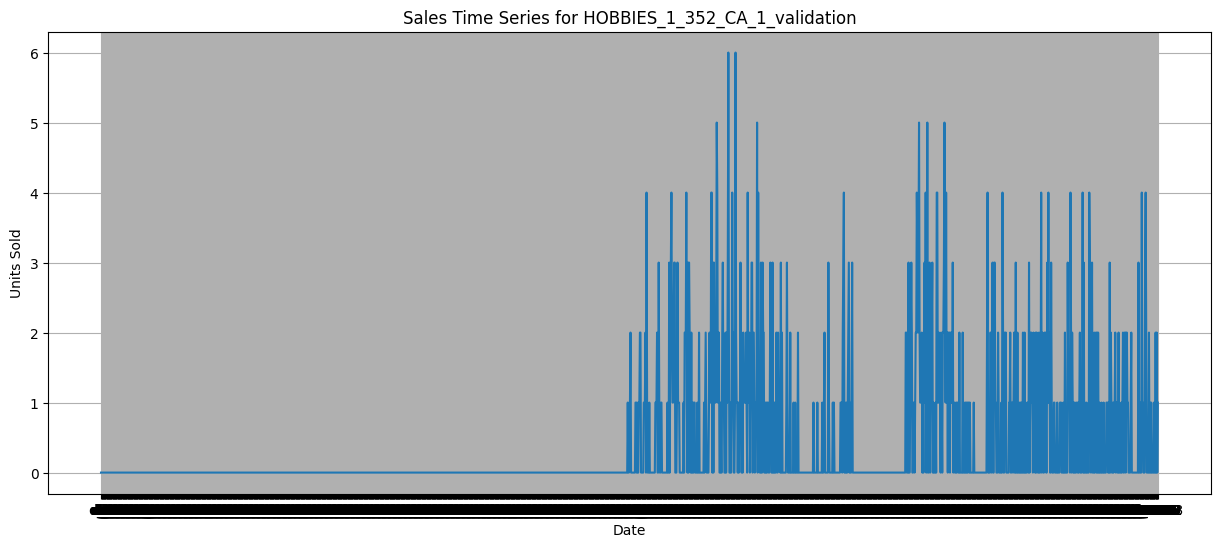

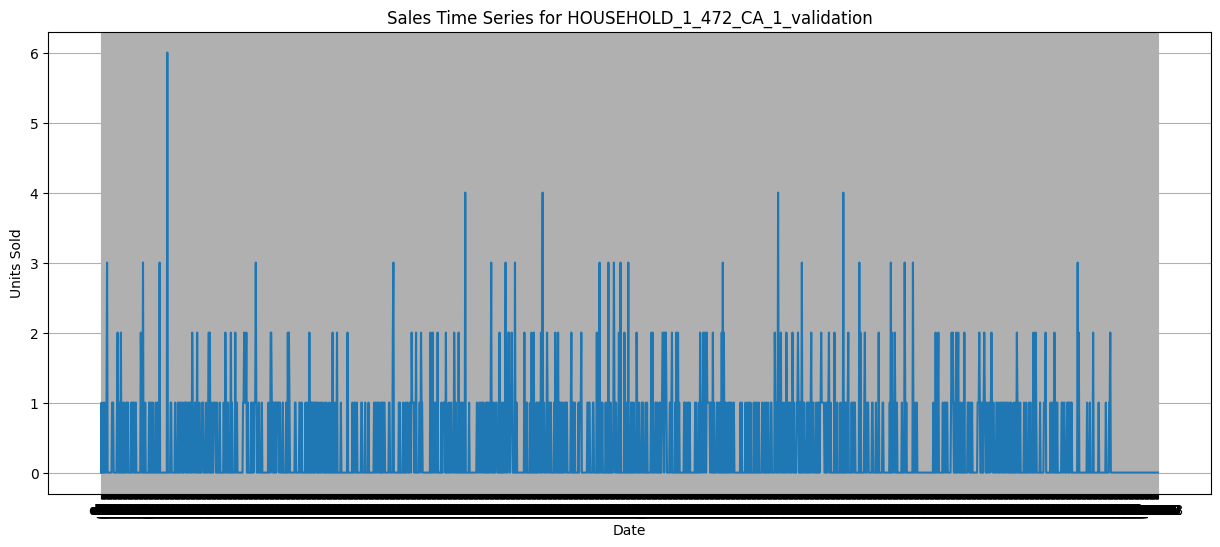

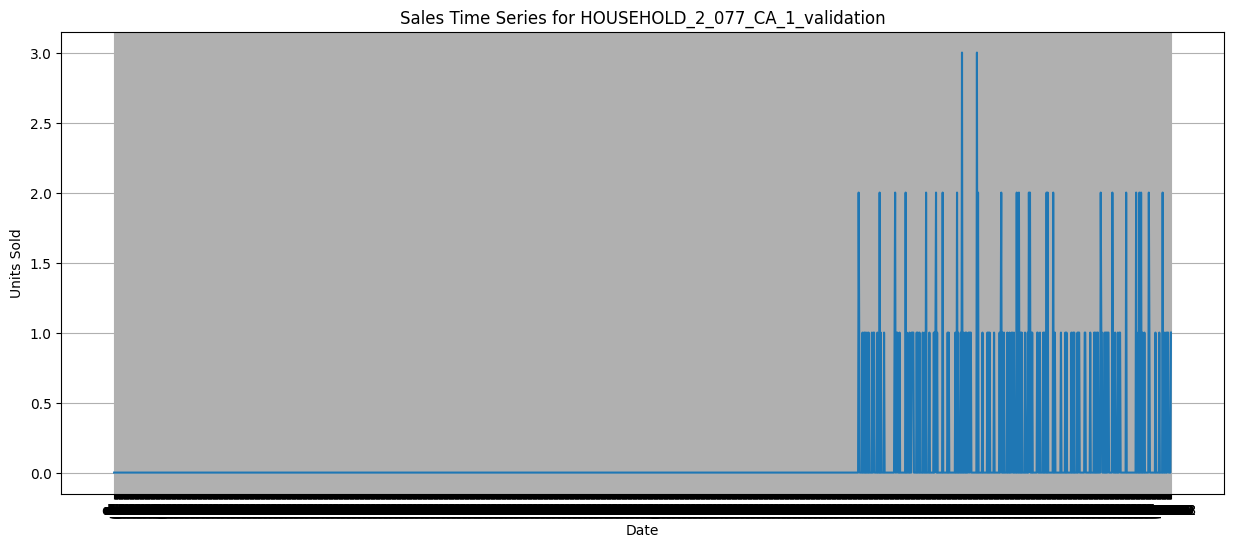

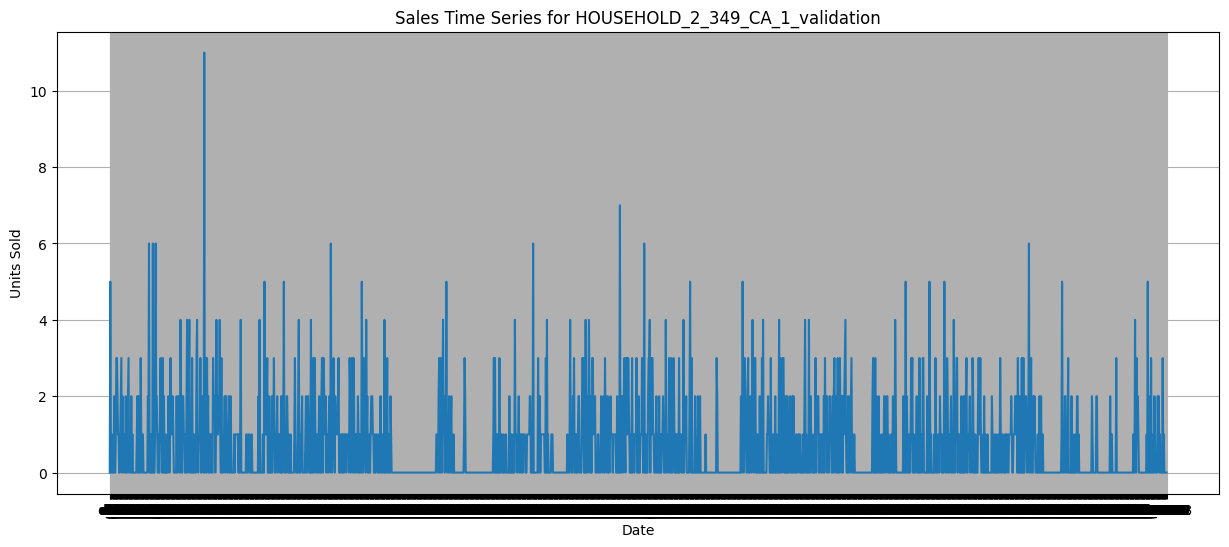

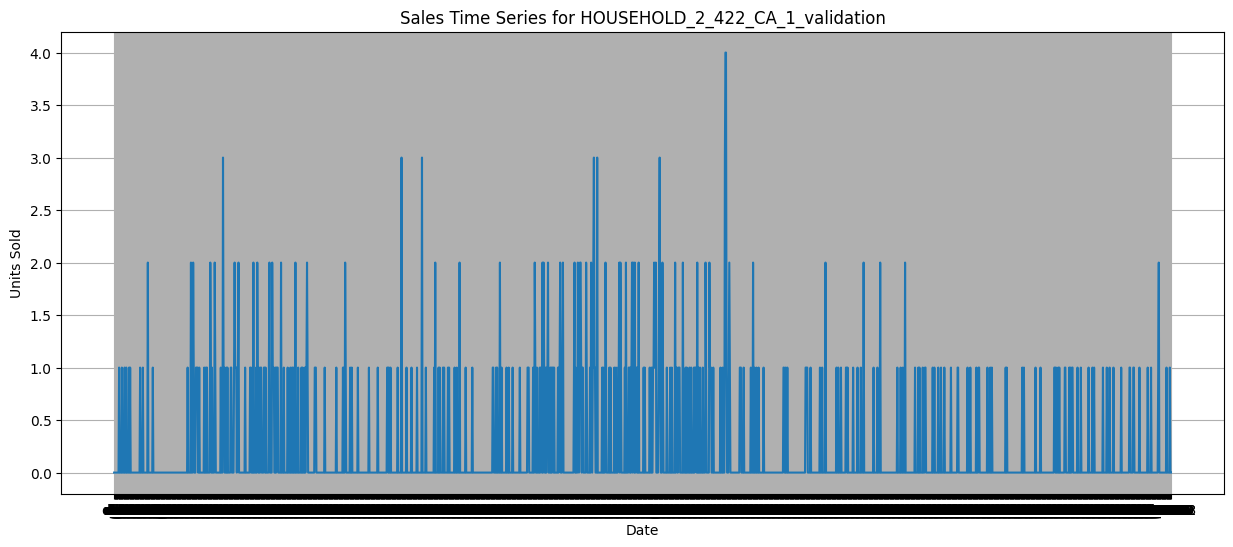

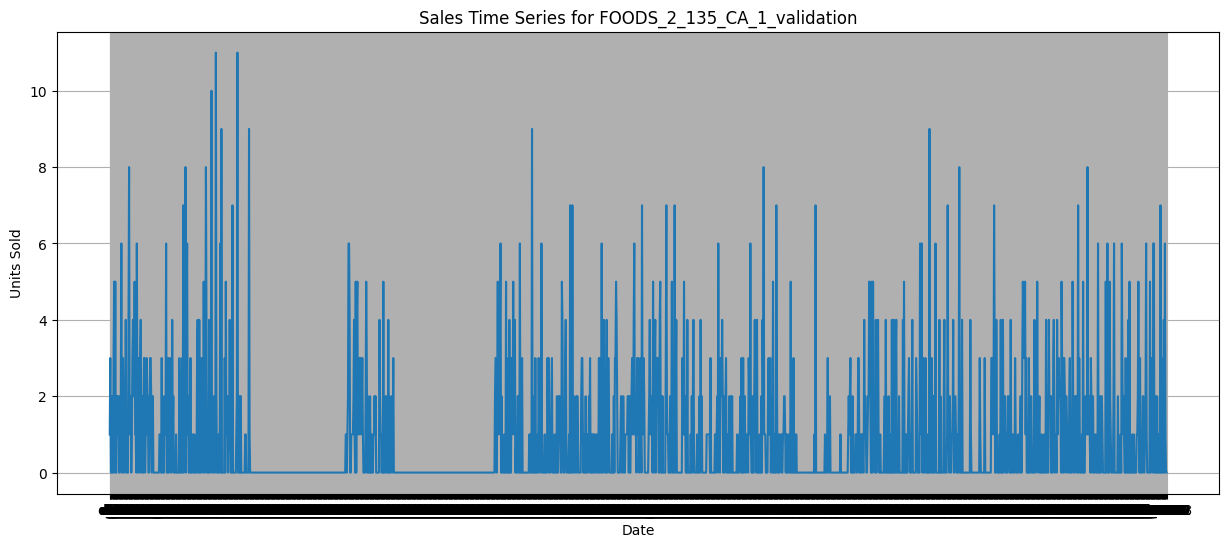

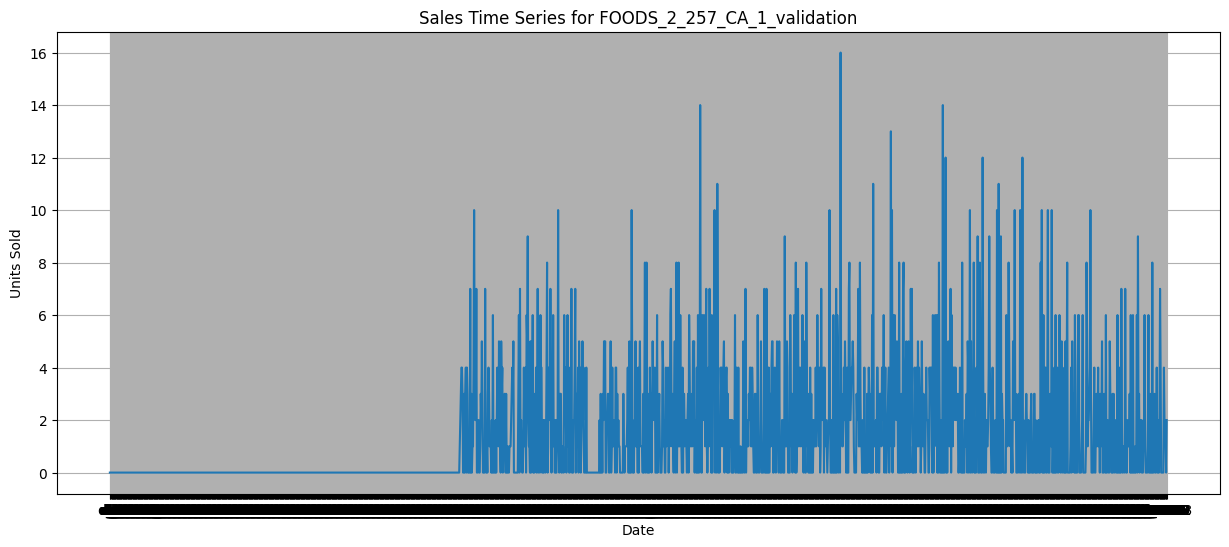

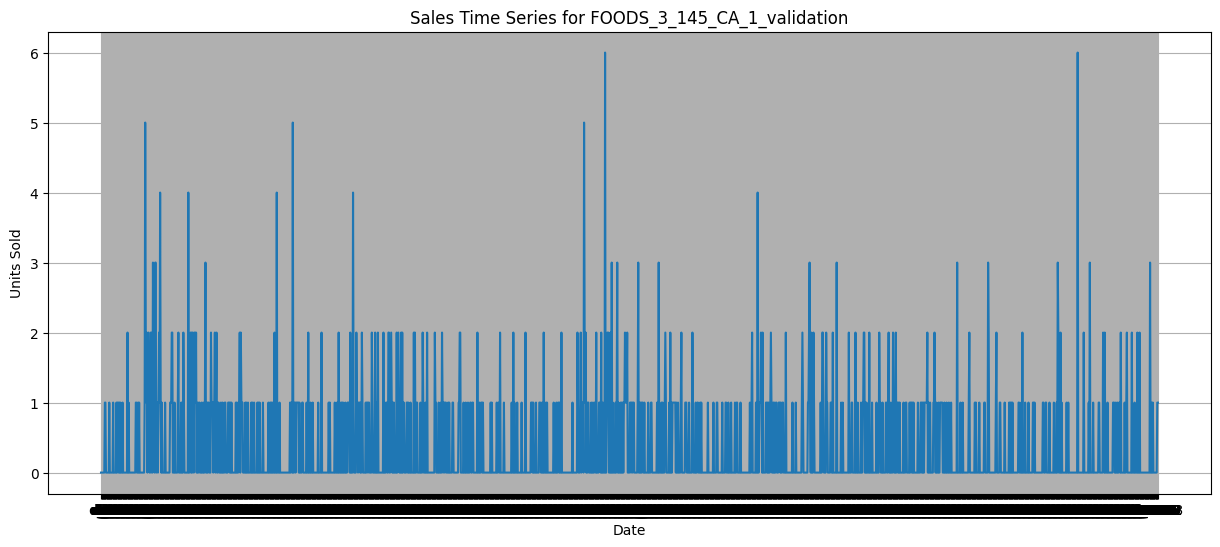

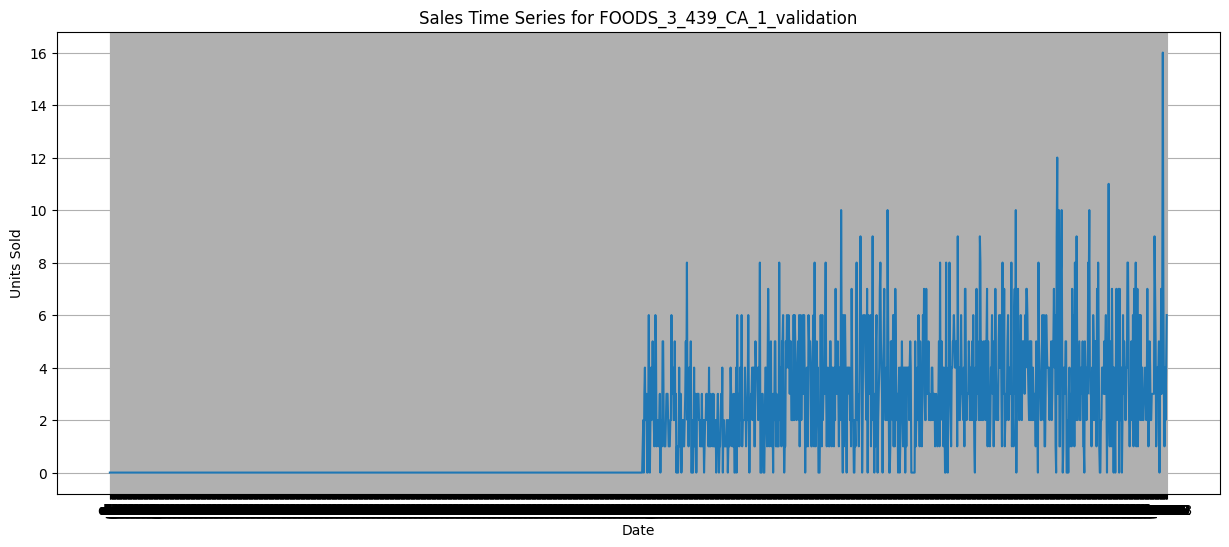

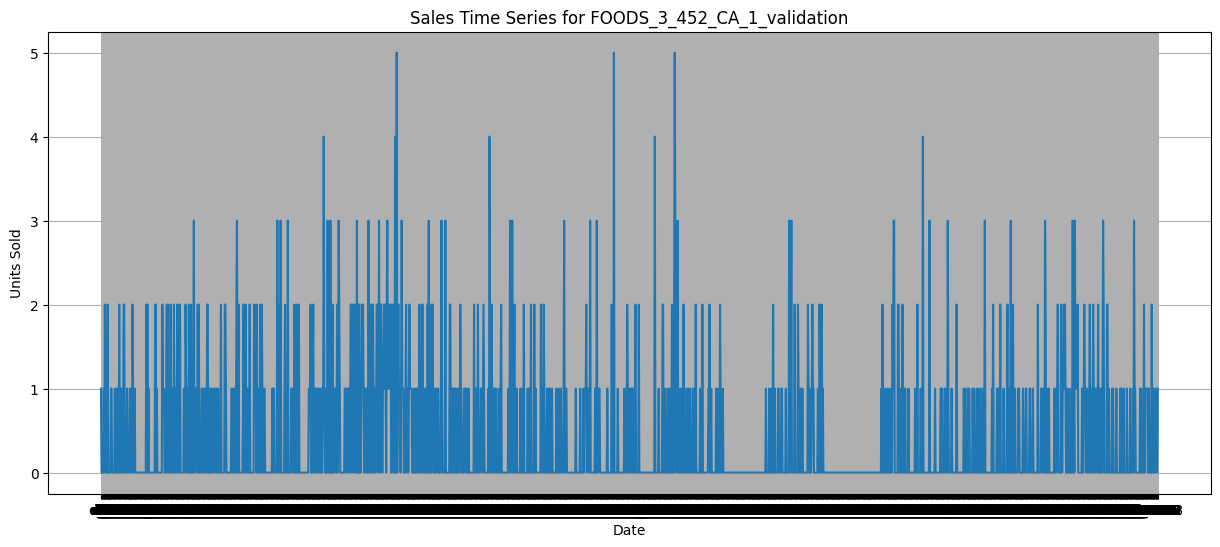

In [10]:
#Define a function to plot each of the 10 time series in SalesFull1
def plotTS(dataset):
  for index, row in dataset.iterrows():
    plt.figure(figsize=(15, 6))
    plot(row.index, row.values)

    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.title(f'Sales Time Series for {index}')
    plt.grid(True)
    plt.show()
plotTS(salesFull1)

In [54]:
#Test the series with ADF
for index, row in salesFull1.iterrows():
  adfuller_test(row)

ADF Test Statistic : -3.8831269625479927
p-value : 0.002162592838628739
#Lags Used : 21
Number of Observations Used : 1891
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -43.61819649903231
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1912
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -2.9499307675394006
p-value : 0.03984222715113347
#Lags Used : 23
Number of Observations Used : 1889
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -5.976409535573229
p-value : 1.882912094500756e-07
#Lags Used : 23
Number of Observations Used : 1889
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -5.464966612896438
p-value : 2.47054820

##Form ARIMA models

In [11]:
# prompt: use auto_arima to make a model for each of the rows in salesFull1

arima_models = {}

for index, row in salesFull1.iterrows():
    product_id = index  # 'id' is the index after pivoting
    series = row.values # The values for the time series

    # Use auto_arima to find the best ARIMA model parameters
    model = pm.auto_arima(series,
                          seasonal=True,       # Set to True if you expect seasonality
                          m=1,                # Set seasonal period (e.g., 7 for weekly)
                          stepwise=True,
                          suppress_warnings=True,
                          error_action='ignore',
                          trace=True) # Set trace to True to see the progress

    # Store the fitted model
    arima_models[product_id] = model
    print(f"Fitted ARIMA model for product: {product_id}")

# You can now access the fitted models in the arima_models dictionary
# For example, to see the summary of the model for the first product:
# print(arima_models[list(arima_models.keys())[0]].summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4258.224, Time=6.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5270.551, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4818.097, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4263.792, Time=3.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5268.552, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4255.704, Time=9.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4254.567, Time=1.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4256.178, Time=6.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4254.234, Time=1.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4255.966, Time=1.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4615.596, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4252.298, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4261.840, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4816.098, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]          

KeyboardInterrupt: 

##Use ARIMA models to predict and test the evaluation.

# Transformer Model with Tokenization

In [12]:
# Check dtype of entire tensor
print("X_train dtype:", X_train.dtype)

# Try inspecting one feature vector
print("Example row sample:", X_train[0, 0, :])
print("Non-numeric columns in first sample:",
      [i for i, val in enumerate(X_train[0, 0, :]) if isinstance(val, str)])


NameError: name 'X_train' is not defined

In [13]:
def tokenize_time_series(
    sales_df,
    feature_cols,
    token_size=56,
    target_window=1,
    product_ids=None
):
    X = []
    Y = []

    if product_ids is None:
        product_ids = sales_df['id'].unique()

    original_points = 0  # for comparison
    used_points = 0      # sum of points in X and Y

    for pid in product_ids:
        df = sales_df[sales_df['id'] == pid].sort_values('date').reset_index(drop=True)

        features = df[feature_cols].values       # [T, num_features]
        targets = df['units_sold'].values        # [T]

        T = len(df)
        original_points += T

        max_start = T - token_size - target_window + 1

        for start in range(max_start):
            x_seq = features[start : start + token_size]
            y_seq = targets[start + token_size : start + token_size + target_window]

            X.append(x_seq)
            Y.append(y_seq)

            used_points += token_size + target_window

    # Convert to arrays
    X = np.array(X)
    Y = np.array(Y)

    print(f"✅ Tokenization complete.")
    print(f"🟦 X shape: {X.shape}, Y shape: {Y.shape}")
    print(f"📊 Original total points (units_sold): {original_points}")
    print(f"📦 Tokenized points used: {used_points}")
    print(f"📉 Data not used (edge effect): {original_points - used_points}")

    return X, Y


In [14]:
# Convert categorical columns to strings and then encode
for col in ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']:
    salesFull[col] = salesFull[col].astype(str).fillna("None")
    salesFull[col] = salesFull[col].astype('category').cat.codes

# Use all products or a reproducible subset
np.random.seed(42)
product_subset = np.random.choice(salesFull['id'].unique(), size=10, replace=False)

# Define the list of feature columns you want to use
feature_cols = [
    'units_sold', 'sell_price', 'snap_CA', 'snap_TX', 'snap_WI',
    'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
    'wday', 'month'
]

# Define input/output configuration
token_size = 56
target_window = 1  # or 28 for multi-step forecasting

# Tokenize
X_train, Y_train = tokenize_time_series(
    sales_df=salesFull,
    feature_cols=feature_cols,
    token_size=token_size,
    target_window=target_window,
    product_ids=product_subset
)


✅ Tokenization complete.
🟦 X shape: (18570, 56, 11), Y shape: (18570, 1)
📊 Original total points (units_sold): 19130
📦 Tokenized points used: 1058490
📉 Data not used (edge effect): -1039360


(18570, 56, 11)

In [ ]:
import numpy as np

# Compute NaNs per feature (i.e., last axis)
nan_per_column = np.isnan(X_train).sum(axis=(0, 1))  # sum over all time steps and samples

# Total entries per feature
total_per_column = X_train.shape[0] * X_train.shape[1]

# Print NaN stats per feature
for i, count in enumerate(nan_per_column):
    percent = 100 * count / total_per_column
    print(f"Feature index {i}: {count} NaNs ({percent:.2f}%)")

# Identify columns that are entirely NaN
fully_nan_columns = np.where(nan_per_column == total_per_column)[0]
print("\n🚫 Columns that are fully NaN:", fully_nan_columns.tolist())


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [22]:
# import numpy as np
# import pandas as pd

# # Constants
INPUT_LEN = 224   # Number of past days (encoder input)
OUTPUT_LEN = 28  # Number of future days to predict (decoder output)
N_PRODUCTS = 10  # Number of random products to use for now

# # Select 10 random product IDs
np.random.seed(42)
product_ids = salesFull['id'].unique()
selected_ids = np.random.choice(product_ids, N_PRODUCTS, replace=False)
 # selected_ids = product_ids

 # Create storage
X_train, Y_train = [], []
X_val, Y_val = [], []

 # Loop through each selected product
for pid in selected_ids:
     df = salesFull[salesFull['id'] == pid].sort_values('date').reset_index(drop=True)

     # Create (X, Y) training pairs using sliding window
     for start in range(0, len(df) - INPUT_LEN - OUTPUT_LEN):
        end = start + INPUT_LEN
        x_seq = df.iloc[start:end]['units_sold'].values
        y_seq = df.iloc[end:end + OUTPUT_LEN]['units_sold'].values
        X_train.append(x_seq)
        Y_train.append(y_seq)

     # Final validation sample (last 56 days → next 28)
     x_val = df.iloc[-(INPUT_LEN + OUTPUT_LEN):-OUTPUT_LEN]['units_sold'].values
     y_val = df.iloc[-OUTPUT_LEN:]['units_sold'].values
     X_val.append(x_val)
     Y_val.append(y_val)

# # Convert to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

# # Print shapes to verify
print("X_train shape:", X_train.shape)  # [num_samples, 56]
print("Y_train shape:", Y_train.shape)  # [num_samples, 28]
print("X_val shape:", X_val.shape)      # [10, 56]
print("Y_val shape:", Y_val.shape)      # [10, 28]


X_train shape: (16610, 224)
Y_train shape: (16610, 28)
X_val shape: (10, 224)
Y_val shape: (10, 28)


In [25]:
salesFull.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,30,4,4,2,0,0,0,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,30,4,4,2,0,0,0,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,30,4,4,2,0,0,0,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,30,4,4,2,0,0,0,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,30,4,4,2,0,0,0,NaN


In [ ]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # Create encoders
# event_enc = LabelEncoder()
# type_enc = LabelEncoder()
# # Replace MinMaxScaler with StandardScaler
# scaler_units = StandardScaler()
# scaler_price = StandardScaler()

# # Fit encoders (handle NaNs as "None")
# # Ensure columns are of type object before filling NaNs with new values
# salesFull['event_name_1'] = salesFull['event_name_1'].astype(str).fillna("None")
# salesFull['event_type_1'] = salesFull['event_type_1'].astype(str).fillna("None")
# salesFull['event_name_2'] = salesFull['event_name_2'].astype(str).fillna("None")
# salesFull['event_type_2'] = salesFull['event_type_2'].astype(str).fillna("None")


# salesFull['event_name_1'] = event_enc.fit_transform(salesFull['event_name_1'])
# salesFull['event_type_1'] = type_enc.fit_transform(salesFull['event_type_1'])
# salesFull['event_name_2'] = event_enc.fit_transform(salesFull['event_name_2'])
# salesFull['event_type_2'] = type_enc.fit_transform(salesFull['event_type_2'])


# # Normalize continuous features
# salesFull['sell_price'] = scaler_price.fit_transform(salesFull[['sell_price']])
# salesFull['units_sold'] = scaler_units.fit_transform(salesFull[['units_sold']])

# # Feature columns to use (excluding date, d, id)
# feature_cols = [
#     'units_sold', 'sell_price', 'snap_CA', 'snap_TX', 'snap_WI',
#     'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
#     'wday', 'month'
# ]

# # Rebuild sequences
# X_train, Y_train = [], []
# X_val, Y_val = [], []

# for pid in selected_ids:
#     df = salesFull[salesFull['id'] == pid].sort_values('date').reset_index(drop=True)

#     for start in range(0, len(df) - INPUT_LEN - OUTPUT_LEN):
#         end = start + INPUT_LEN
#         x_seq = df.iloc[start:end][feature_cols].values
#         y_seq = df.iloc[end:end + OUTPUT_LEN]['units_sold'].values
#         X_train.append(x_seq)
#         Y_train.append(y_seq)

#     x_val = df.iloc[-(INPUT_LEN + OUTPUT_LEN):-OUTPUT_LEN][feature_cols].values
#     y_val = df.iloc[-OUTPUT_LEN:]['units_sold'].values
#     X_val.append(x_val)
#     Y_val.append(y_val)

# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
# X_val = np.array(X_val)
# Y_val = np.array(Y_val)

# print("X_train shape:", X_train.shape)  # [N, 56, F]
# print("Y_train shape:", Y_train.shape)  # [N, 28]


In [ ]:
print("NaNs in X_train:", np.isnan(X_train).any())
print("NaNs in Y_train:", np.isnan(Y_train).any())
print("NaNs in X_val:", np.isnan(X_val).any())
print("NaNs in Y_val:", np.isnan(Y_val).any())

print("Infs in X_train:", np.isinf(X_train).any())
print("Infs in Y_train:", np.isinf(Y_train).any())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# # Check which features (columns) have NaNs
# nan_columns = np.any(np.isnan(X_train), axis=(0, 1))
# print("Columns with NaNs:", np.where(nan_columns)[0])

# # Optionally: count NaNs per feature
# nan_counts = np.isnan(X_train).sum(axis=(0, 1))
# print("NaN counts per feature:", nan_counts)


In [ ]:
# # Drop column index 1 from all input arrays (X_train, X_val)
# X_train = np.delete(X_train, 1, axis=2)
# X_val = np.delete(X_val, 1, axis=2)

# print("New X_train shape:", X_train.shape)
# print("New X_val shape:", X_val.shape)


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow.keras.backend as K

# def transformer_block(
#     x,
#     input_shape,
#     heads=8,
#     key_dim=256,
#     encoder_proj_dim=4,
#     dropout_attention=0.25,
#     dropout_projection=0.25,
# ):
#     x0 = layers.MultiHeadAttention(num_heads=heads, key_dim=key_dim)(x, x)
#     x0 = layers.Dropout(dropout_attention)(x0)
#     x0 = layers.Add()([x, x0])
#     x0 = layers.LayerNormalization()(x0)

#     x1 = layers.Conv1D(filters=encoder_proj_dim, kernel_size=1, activation="relu")(x0)
#     x1 = layers.Conv1D(filters=input_shape[-1], kernel_size=1, activation="relu")(x1)
#     x1 = layers.Dropout(dropout_projection)(x1)
#     x1 = layers.Add()([x0, x1])
#     x1 = layers.LayerNormalization()(x1)

#     return x1

# def build_transformer_forecasting_model(
#     input_shape,
#     encoder_blocks=2,
#     feed_forward_units=[256],
#     output_len=28
# ):
#     inputs = keras.Input(shape=input_shape)
#     x = inputs

#     for _ in range(encoder_blocks):
#         x = transformer_block(x, input_shape)

#     x = layers.GlobalAveragePooling1D()(x)
#     for n in feed_forward_units:
#         x = layers.Dense(n, activation="relu")(x)
#         x = layers.Dropout(0.4)(x)

#     outputs = layers.Dense(output_len)(x)  # Linear output for regression
#     model = keras.Model(inputs, outputs)
#     return model

# # Build and compile the model
# input_shape = (56, X_train.shape[-1])  # time steps = 56, features = 10
# transformer_model = build_transformer_forecasting_model(input_shape)

# def sparse_weighted_mse(min_val, weight_non_min=5.0):
#     def loss_fn(y_true, y_pred):
#         is_min = K.cast(K.less_equal(y_true, min_val + 1e-6), K.floatx())  # handles numerical noise
#         weights = 1.0 + (1.0 - is_min) * (weight_non_min - 1.0)
#         return K.mean(weights * K.square(y_true - y_pred))
#     return loss_fn

# transformer_model.compile(
#     loss=sparse_weighted_mse(min_val),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=["mae"]
# )

# transformer_model.summary()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# 1. ReduceLROnPlateau: Lower learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

# 2. EarlyStopping: Stop training if no improvement for too long
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

# 3. ModelCheckpoint: Save the best model during training
checkpoint = ModelCheckpoint(
    filepath='content/best_transformer_model.keras',  # Keras format
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [ ]:
# transformer_model.fit(
#     X_train,
#     Y_train,
#     validation_data=(X_val, Y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[reduce_lr, early_stop, checkpoint],
#     verbose=1
# )


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# # Make predictions on validation set
# Y_pred = transformer_model.predict(X_val[..., np.newaxis])  # shape: [10, 28]

# # Compute MSE and MAE manually for validation set
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# for i in range(len(Y_val)):
#     mse = mean_squared_error(Y_val[i], Y_pred[i])
#     mae = mean_absolute_error(Y_val[i], Y_pred[i])
#     print(f"Validation Sample {i + 1}: MSE = {mse:.4f}, MAE = {mae:.4f}")


In [ ]:
# import matplotlib.pyplot as plt

# # Plot a few example predictions
# for i in range(min(Y_val.shape[0])):  # Use shape[0] to get the first dimension size
#     plt.figure(figsize=(10, 4))
#     plt.plot(range(28), Y_val[i], label='True', marker='o')
#     plt.plot(range(28), Y_pred[i], label='Predicted', marker='x')
#     plt.title(f"Validation Sample {i + 1}")
#     plt.xlabel('Day')
#     plt.ylabel('Units Sold')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# Transformer Model without Tokenization

In [ ]:
# # Constants
# INPUT_LEN = 1880   # Number of past days (encoder input)
# OUTPUT_LEN = 28  # Number of future days to predict (decoder output)
# N_PRODUCTS = 10  # Number of random products to use for now

# # Create storage
# X_train, Y_train = [], []
# X_val, Y_val = [], []

# # Select 10 random product IDs
# np.random.seed(42)
# product_ids = salesFull['id'].unique()
# selected_ids = np.random.choice(product_ids, N_PRODUCTS, replace=False)
# # selected_ids = product_ids

# # Loop through each selected product
# for pid in selected_ids:
#     df = salesFull[salesFull['id'] == pid].sort_values('date').reset_index(drop=True)

#     # Create (X, Y) training pairs using sliding window
#     for start in range(0, len(df) - INPUT_LEN - OUTPUT_LEN):
#         end = start + INPUT_LEN
#         x_seq = df.iloc[start:end]['units_sold'].values
#         y_seq = df.iloc[end:end + OUTPUT_LEN]['units_sold'].values
#         X_train.append(x_seq)
#         Y_train.append(y_seq)

#     # Final validation sample (last 56 days → next 28)
#     x_val = df.iloc[-(INPUT_LEN + OUTPUT_LEN):-OUTPUT_LEN]['units_sold'].values
#     y_val = df.iloc[-OUTPUT_LEN:]['units_sold'].values
#     X_val.append(x_val)
#     Y_val.append(y_val)

# # Convert to numpy arrays
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
# X_val = np.array(X_val)
# Y_val = np.array(Y_val)

# # Print shapes to verify
# print("X_train shape:", X_train.shape)  # [num_samples, 56]
# print("Y_train shape:", Y_train.shape)  # [num_samples, 28]
# print("X_val shape:", X_val.shape)      # [10, 56]
# print("Y_val shape:", Y_val.shape)      # [10, 28]


In [ ]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# # Create encoders
# event_enc = LabelEncoder()
# type_enc = LabelEncoder()
# # Replace MinMaxScaler with StandardScaler
# scaler_units = StandardScaler()
# scaler_price = StandardScaler()

# # Fit encoders (handle NaNs as "None")
# # Ensure columns are of type object before filling NaNs with new values
# salesFull['event_name_1'] = salesFull['event_name_1'].astype(str).fillna("None")
# salesFull['event_type_1'] = salesFull['event_type_1'].astype(str).fillna("None")
# salesFull['event_name_2'] = salesFull['event_name_2'].astype(str).fillna("None")
# salesFull['event_type_2'] = salesFull['event_type_2'].astype(str).fillna("None")


# salesFull['event_name_1'] = event_enc.fit_transform(salesFull['event_name_1'])
# salesFull['event_type_1'] = type_enc.fit_transform(salesFull['event_type_1'])
# salesFull['event_name_2'] = event_enc.fit_transform(salesFull['event_name_2'])
# salesFull['event_type_2'] = type_enc.fit_transform(salesFull['event_type_2'])


# # Normalize continuous features
# salesFull['sell_price'] = scaler_price.fit_transform(salesFull[['sell_price']])
# salesFull['units_sold'] = scaler_units.fit_transform(salesFull[['units_sold']])

# # Feature columns to use (excluding date, d, id)
# feature_cols = [
#     'units_sold', 'sell_price', 'snap_CA', 'snap_TX', 'snap_WI',
#     'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
#     'wday', 'month'
# ]

# # Rebuild sequences
# X_train, Y_train = [], []
# X_val, Y_val = [], []

# for pid in selected_ids:
#     df = salesFull[salesFull['id'] == pid].sort_values('date').reset_index(drop=True)

#     for start in range(0, len(df) - INPUT_LEN - OUTPUT_LEN):
#         end = start + INPUT_LEN
#         x_seq = df.iloc[start:end][feature_cols].values
#         y_seq = df.iloc[end:end + OUTPUT_LEN]['units_sold'].values
#         X_train.append(x_seq)
#         Y_train.append(y_seq)

#     x_val = df.iloc[-(INPUT_LEN + OUTPUT_LEN):-OUTPUT_LEN][feature_cols].values
#     y_val = df.iloc[-OUTPUT_LEN:]['units_sold'].values
#     X_val.append(x_val)
#     Y_val.append(y_val)

# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
# X_val = np.array(X_val)
# Y_val = np.array(Y_val)

# print("X_train shape:", X_train.shape)  # [N, 56, F]
# print("Y_train shape:", Y_train.shape)  # [N, 28]


In [ ]:
# print("NaNs in X_train:", np.isnan(X_train).any())
# print("NaNs in Y_train:", np.isnan(Y_train).any())
# print("NaNs in X_val:", np.isnan(X_val).any())
# print("NaNs in Y_val:", np.isnan(Y_val).any())

# print("Infs in X_train:", np.isinf(X_train).any())
# print("Infs in Y_train:", np.isinf(Y_train).any())

In [ ]:
# # Drop column index 1 from all input arrays (X_train, X_val)
# X_train = np.delete(X_train, 1, axis=2)
# X_val = np.delete(X_val, 1, axis=2)

# print("New X_train shape:", X_train.shape)
# print("New X_val shape:", X_val.shape)


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow.keras.backend as K

# def transformer_block(
#     x,
#     input_shape,
#     heads=8,
#     key_dim=256,
#     encoder_proj_dim=4,
#     dropout_attention=0.25,
#     dropout_projection=0.25,
# ):
#     x0 = layers.MultiHeadAttention(num_heads=heads, key_dim=key_dim)(x, x)
#     x0 = layers.Dropout(dropout_attention)(x0)
#     x0 = layers.Add()([x, x0])
#     x0 = layers.LayerNormalization()(x0)

#     x1 = layers.Conv1D(filters=encoder_proj_dim, kernel_size=1, activation="relu")(x0)
#     x1 = layers.Conv1D(filters=input_shape[-1], kernel_size=1, activation="relu")(x1)
#     x1 = layers.Dropout(dropout_projection)(x1)
#     x1 = layers.Add()([x0, x1])
#     x1 = layers.LayerNormalization()(x1)

#     return x1

# def build_transformer_forecasting_model(
#     input_shape,
#     encoder_blocks=2,
#     feed_forward_units=[256],
#     output_len=28
# ):
#     inputs = keras.Input(shape=input_shape)
#     x = inputs

#     for _ in range(encoder_blocks):
#         x = transformer_block(x, input_shape)

#     x = layers.GlobalAveragePooling1D()(x)
#     for n in feed_forward_units:
#         x = layers.Dense(n, activation="relu")(x)
#         x = layers.Dropout(0.4)(x)

#     outputs = layers.Dense(output_len)(x)  # Linear output for regression
#     model = keras.Model(inputs, outputs)
#     return model

# # Build and compile the model
# input_shape = (INPUT_LEN, X_train.shape[-1])  # time steps = 56, features = 10
# transformer_model = build_transformer_forecasting_model(input_shape)

# # def sparse_weighted_mse(min_val, weight_non_min=5.0):
# #     def loss_fn(y_true, y_pred):
# #         is_min = K.cast(K.less_equal(y_true, min_val + 1e-6), K.floatx())  # handles numerical noise
# #         weights = 1.0 + (1.0 - is_min) * (weight_non_min - 1.0)
# #         return K.mean(weights * K.square(y_true - y_pred))
# #     return loss_fn

# transformer_model.compile(
#     loss='mse',
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=["mae"]
# )

# transformer_model.summary()


In [ ]:
# transformer_model.fit(
#     X_train,
#     Y_train,
#     validation_data=(X_val, Y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[reduce_lr, early_stop, checkpoint],
#     verbose=1
# )
